## Step I: Importing Libraries

In [1]:
#data manipulation libraries 
import pandas as pd
import numpy as np

#data visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

#library to split that data
from sklearn.model_selection import train_test_split

#Data Preprocessing libraries
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

## Regression Models
from sklearn.linear_model import LinearRegression  # Class for linear regression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor  # Class for random forest regression
import xgboost as xgb # class for xg boost regressor

## Model Evaluation
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error #for mean squared, absolute error and R-squared
from sklearn.model_selection import cross_val_score  # Function for evaluating model performance using cross-validation

## Step II: Reading the dataset

In [2]:
df = pd.read_csv("House Price India.csv")

In [3]:
df.head()

,id,Date,No of bedrooms,No of bathrooms,living area,lot area,No of floors,waterfront present,No of views,house condition,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,No of schools nearby,Distance from the airport,Price
0,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
1,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
2,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
3,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000
4,6762813105,42491,3,2.50,2600,4750,1.0,0,0,4,...,1951,0,122007,52.9133,-114.590,2380,4750,1,67,790000


In [4]:
# Deleting columns which are not useful for model building
df.drop(columns = ['id','Date'], axis = 1, inplace = True)

In [5]:
df.describe()

,No of bedrooms,No of bathrooms,living area,lot area,No of floors,waterfront present,No of views,house condition,house grade,house area(excluding basement),...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,No of schools nearby,Distance from the airport,Price
count,14619.000000,14619.000000,14619.000000,1.461900e+04,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,...,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,1.461900e+04
mean,3.379233,2.129557,2098.156851,1.509369e+04,1.502326,0.007661,0.232848,3.430399,7.682263,1801.676654,...,1970.929817,90.930228,122033.064300,52.792843,-114.403996,1996.641836,12754.003078,2.012244,64.951433,5.388063e+05
std,0.938655,0.769955,928.218740,3.792089e+04,0.540241,0.087196,0.765651,0.664047,1.174917,833.737588,...,29.491743,416.230218,19.081451,0.137525,0.141325,691.078387,26059.234785,0.817312,8.936129,3.672294e+05
min,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,4.000000,370.000000,...,1900.000000,0.000000,122003.000000,52.385900,-114.709000,460.000000,651.000000,1.000000,50.000000,7.800000e+04
25%,3.000000,1.750000,1440.000000,5.010500e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,...,1951.000000,0.000000,122017.000000,52.707600,-114.519000,1490.000000,5097.500000,1.000000,57.000000,3.200000e+05
50%,3.000000,2.250000,1930.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1580.000000,...,1975.000000,0.000000,122032.000000,52.806400,-114.421000,1850.000000,7620.000000,2.000000,65.000000,4.500000e+05
75%,4.000000,2.500000,2570.000000,1.080000e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2240.000000,...,1997.000000,0.000000,122048.000000,52.908900,-114.315000,2380.000000,10125.000000,3.000000,73.000000,6.450000e+05
max,33.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,...,2015.000000,2015.000000,122072.000000,53.007600,-113.505000,6110.000000,560617.000000,3.000000,80.000000,7.700000e+06


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14619 entries, 0 to 14618
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   No of bedrooms                  14619 non-null  int64  
 1   No of bathrooms                 14619 non-null  float64
 2   living area                     14619 non-null  int64  
 3   lot area                        14619 non-null  int64  
 4   No of floors                    14619 non-null  float64
 5   waterfront present              14619 non-null  int64  
 6   No of views                     14619 non-null  int64  
 7   house condition                 14619 non-null  int64  
 8   house grade                     14619 non-null  int64  
 9   house area(excluding basement)  14619 non-null  int64  
 10  Area of the basement            14619 non-null  int64  
 11  Built Year                      14619 non-null  int64  
 12  Renovation Year                 

In [7]:
df.shape

(14619, 21)

## Step III: Understanding The Dataset & Feature Engineering

In [8]:
df.columns

Index(['No of bedrooms', 'No of bathrooms', 'living area', 'lot area',
       'No of floors', 'waterfront present', 'No of views', 'house condition',
       'house grade', 'house area(excluding basement)', 'Area of the basement',
       'Built Year', 'Renovation Year', 'Postal Code', 'Lattitude',
       'Longitude', 'living_area_renov', 'lot_area_renov',
       'No of schools nearby', 'Distance from the airport', 'Price'],
      dtype='object')

In [9]:
df['No of bathrooms'].unique()

array([2.5 , 2.75, 2.  , 3.25, 1.75, 2.25, 1.  , 1.5 , 3.  , 8.  , 3.5 ,
       4.25, 4.  , 5.  , 3.75, 4.5 , 5.75, 1.25, 6.5 , 4.75, 0.75, 5.25,
       5.5 , 6.25, 6.75, 7.5 , 0.5 , 6.  , 7.75])

In [10]:
df.groupby('No of bathrooms').size()

No of bathrooms
0.50       3
0.75      47
1.00    2509
1.25       7
1.50     968
1.75    2062
2.00    1323
2.25    1378
2.50    3677
2.75     831
3.00     510
3.25     424
3.50     504
3.75     101
4.00      81
4.25      56
4.50      72
4.75      17
5.00      15
5.25      12
5.50       8
5.75       2
6.00       3
6.25       2
6.50       1
6.75       2
7.50       1
7.75       1
8.00       2
dtype: int64

**the no of bathrooms and no of floors are in float value and rounding it off may change the data so we'll use it as it is**

In [11]:
df['Renovation Year'].unique()

array([   0, 1994, 1954, 2011, 1998, 1992, 1958, 2014, 2002, 2004, 2013,
       1986, 2005, 1990, 2001, 1984, 1956, 2000, 2010, 2003, 1996, 1977,
       2007, 1983, 1970, 1981, 1975, 1971, 1988, 1999, 2009, 1995, 1969,
       1997, 2015, 1982, 1989, 2006, 1985, 1993, 1953, 1955, 1979, 1987,
       1960, 1934, 1945, 2008, 2012, 1980, 1972, 1948, 1978, 1991, 1968,
       1974, 1965, 1946, 1940, 1963, 1976, 1964, 1973, 1967, 1944, 1959,
       1957, 1962], dtype=int64)

**Changing 0 to their build year because it seems like 0 represents that it never got renovation and if it will be 0 it will increase the outliers**

In [12]:
df.groupby('Renovation Year').size()

Renovation Year
0       13953
1934        1
1940        2
1944        1
1945        2
        ...  
2011       11
2012        9
2013       30
2014       76
2015        6
Length: 68, dtype: int64

In [13]:
df.shape

(14619, 21)


* **In 14619 rows of data 13953 is '0' if I drop this column it will simplifies the dataset but I may lose potentially valuable information about houses that have been renovated.**

* **If I replace '0' with their build year it may introduce noise because it is obvious that houses with '0' will not have the same condition as when they were built and it could mislead the model**

Lets check the correlation first between renovation year and Prices

In [14]:
#is renovation year has any correlation with price
corr_matrix = df.corr()

In [15]:
corr_matrix['Price'].sort_values(ascending = False)

Price                             1.000000
living area                       0.712276
house grade                       0.671805
house area(excluding basement)    0.615179
living_area_renov                 0.585021
No of bathrooms                   0.532031
No of views                       0.394954
Area of the basement              0.330499
No of bedrooms                    0.308165
Lattitude                         0.297570
waterfront present                0.263943
No of floors                      0.262649
Renovation Year                   0.133362
lot area                          0.082117
lot_area_renov                    0.075697
Built Year                        0.050936
house condition                   0.040609
Longitude                         0.024807
No of schools nearby              0.009904
Distance from the airport         0.004074
Postal Code                      -0.115477
Name: Price, dtype: float64

* **Renovation Year has negligible linear relationship with Price.**
* **lot area, lot_area_renov, Built Year, house condition, Longitude, No of schools nearby, Distance from the airport has no linear relationship with Price.**
* **Postal code has negative linear relation but it is not strong**

We'll do feature engineering to make data simple

In [16]:
df["Total floor area"] = df['house area(excluding basement)'] + df['Area of the basement']

In [17]:
df[df['lot_area_renov'] == 0]

,No of bedrooms,No of bathrooms,living area,lot area,No of floors,waterfront present,No of views,house condition,house grade,house area(excluding basement),...,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,No of schools nearby,Distance from the airport,Price,Total floor area


In [18]:
df['total lot area'] = df['lot area']+df['lot_area_renov']

In [19]:
df.drop(columns=['lot area','lot_area_renov'], axis= 1, inplace = True)

In [20]:
df.drop(columns=['house area(excluding basement)','Area of the basement'], axis= 1, inplace=True)

In [21]:
df['living_area_renov'].shape

(14619,)

In [22]:
df['living area'].shape

(14619,)

In [23]:
df['Total living area'] = df['living area']+df['living_area_renov']

In [24]:
df.drop(columns = ['living area','living_area_renov'], axis=1,inplace=True)

In [25]:
df['Postal Code'].nunique()

70

In [26]:
df['Postal Code'].unique()

array([122004, 122005, 122006, 122007, 122008, 122009, 122010, 122011,
       122012, 122013, 122014, 122015, 122016, 122017, 122018, 122019,
       122020, 122021, 122022, 122023, 122024, 122025, 122026, 122027,
       122028, 122029, 122030, 122031, 122032, 122033, 122034, 122035,
       122036, 122037, 122038, 122039, 122040, 122041, 122042, 122043,
       122044, 122045, 122046, 122047, 122048, 122049, 122003, 122050,
       122051, 122052, 122053, 122054, 122055, 122056, 122057, 122058,
       122059, 122060, 122061, 122062, 122063, 122064, 122065, 122066,
       122067, 122068, 122069, 122070, 122071, 122072], dtype=int64)

**only last two values are changing so we'll keep only the last two digits to represent postal code**

In [27]:
df['Postal ending'] = df['Postal Code'].apply(lambda x:x%100)

In [28]:
df.drop('Postal Code',axis = 1, inplace = True)

In [29]:
df['Postal ending']

0         4
1         4
2         5
3         6
4         7
         ..
14614    66
14615    72
14616    56
14617    42
14618    18
Name: Postal ending, Length: 14619, dtype: int64

## Step IV: Checking The Data Distribution and Outliers

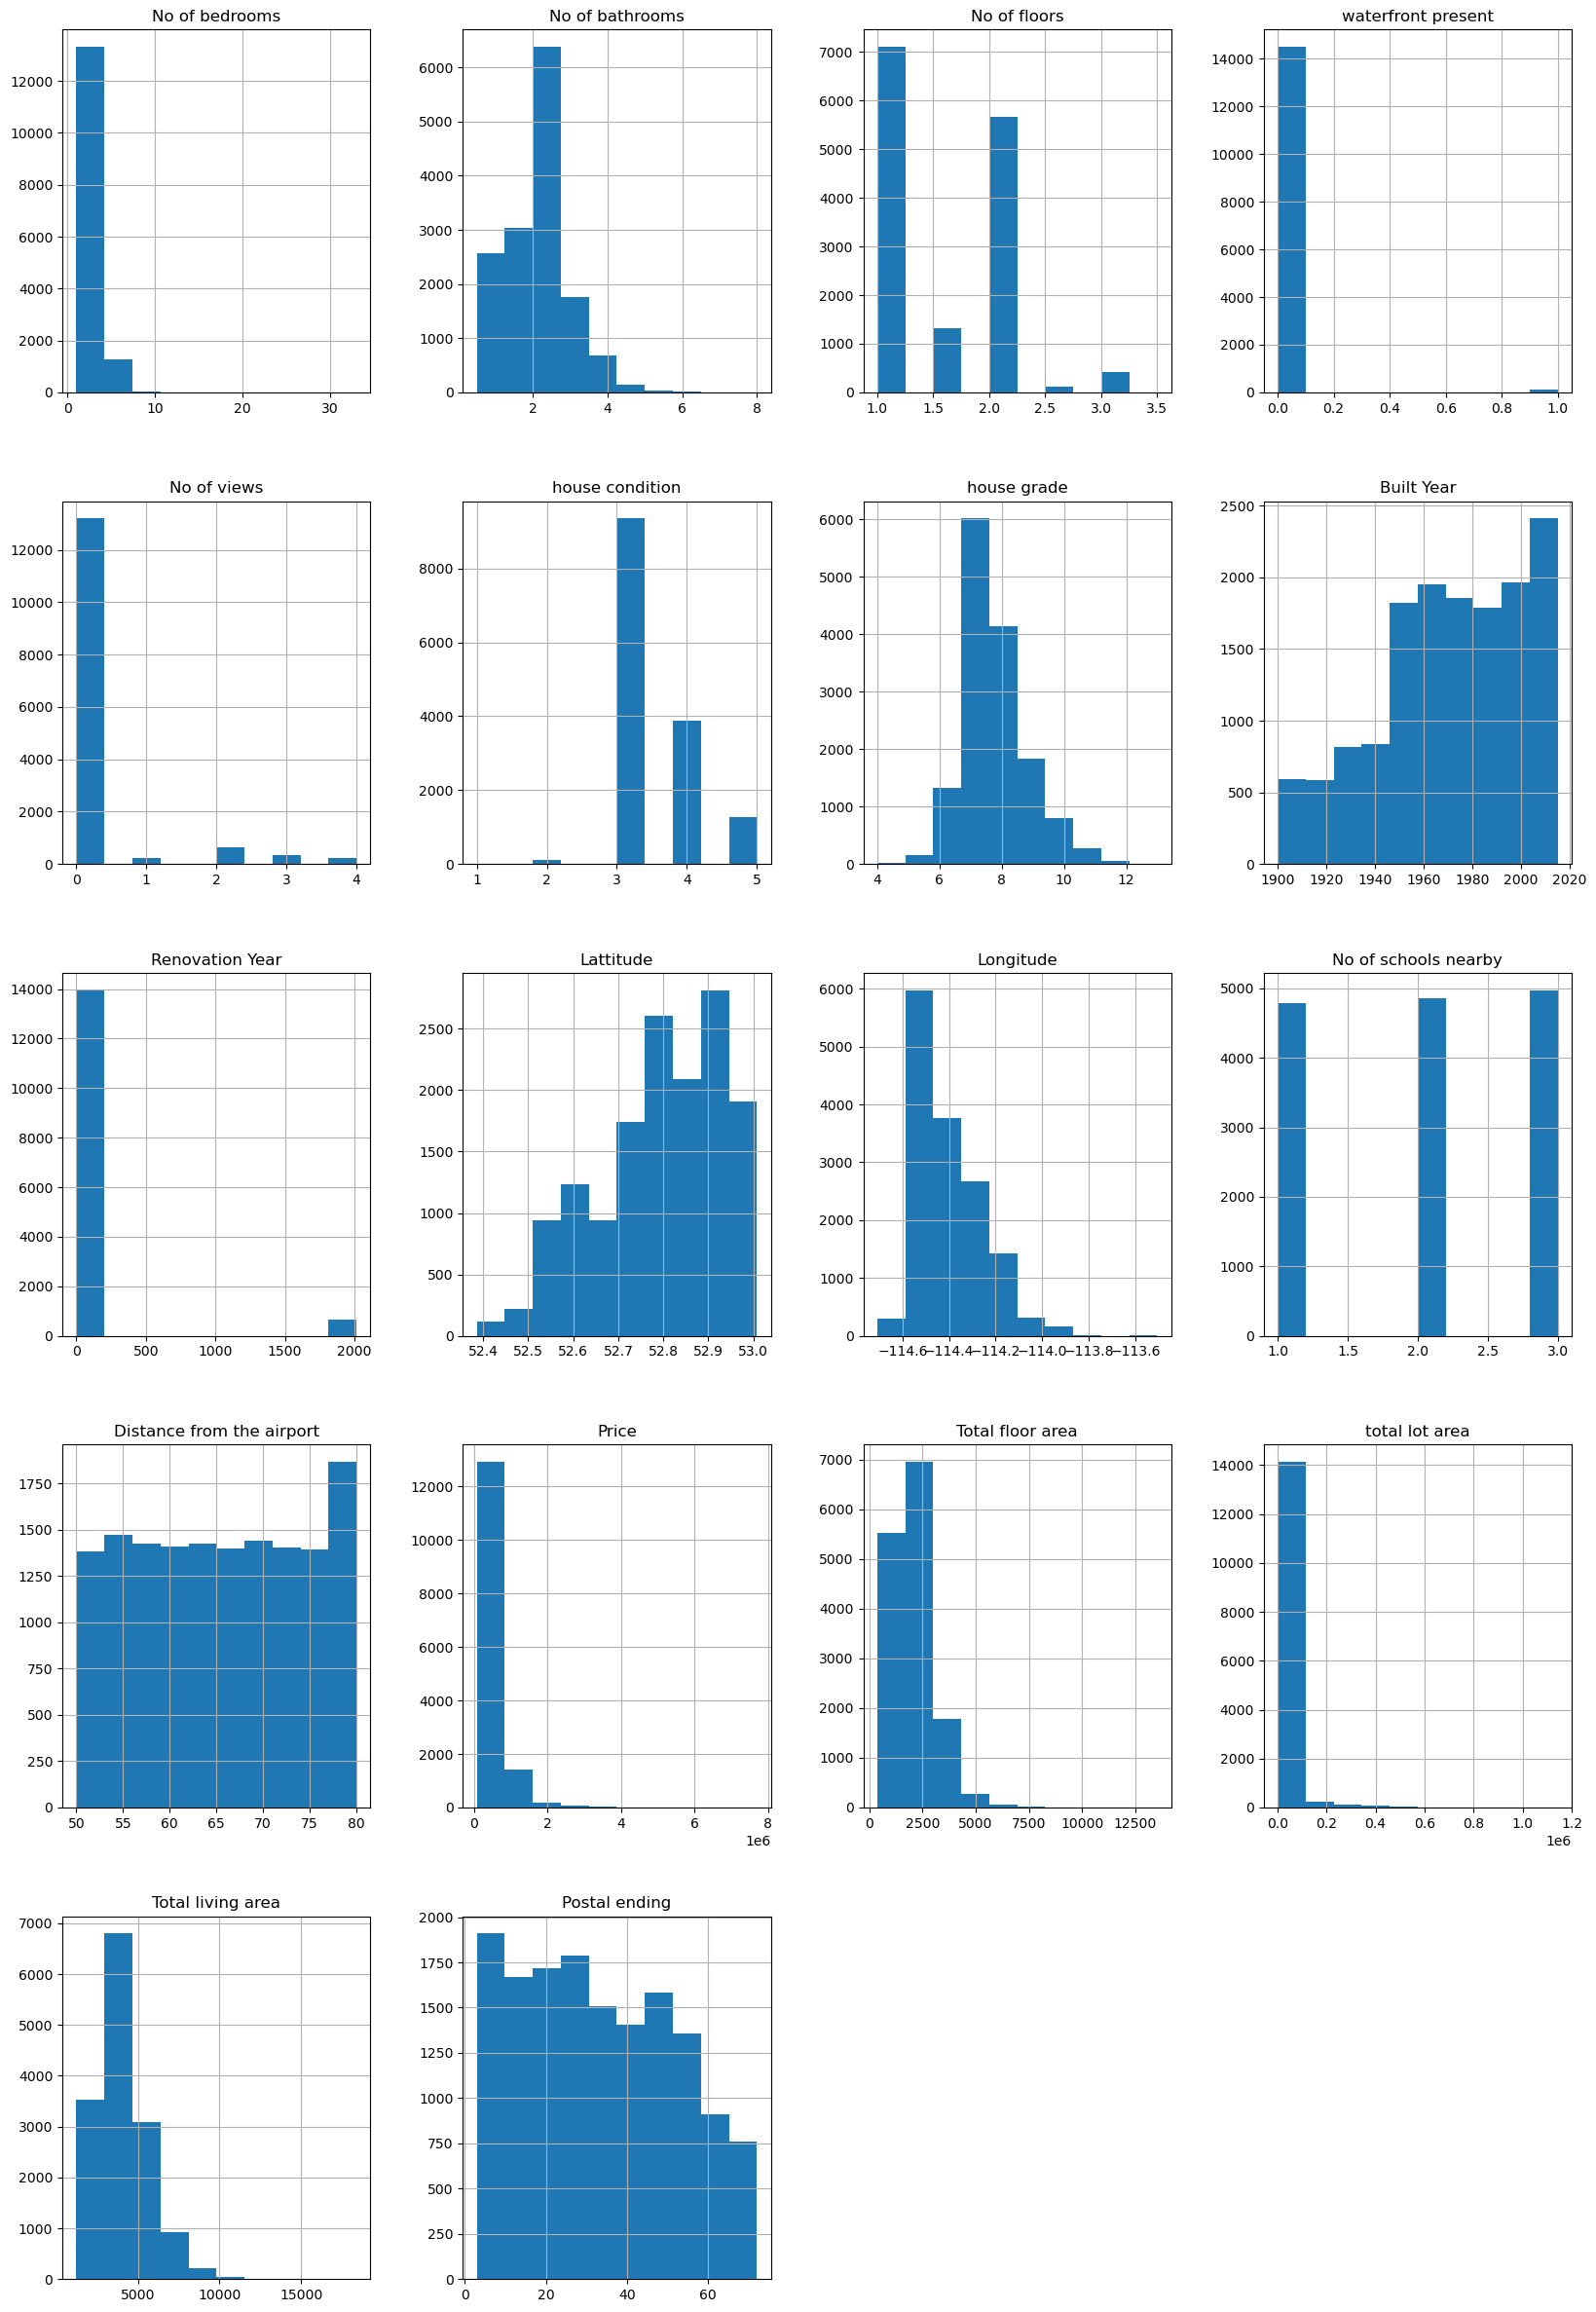

In [30]:
#Plotting histogram to check the distribution
df.hist(figsize = (20,30))
plt.show()

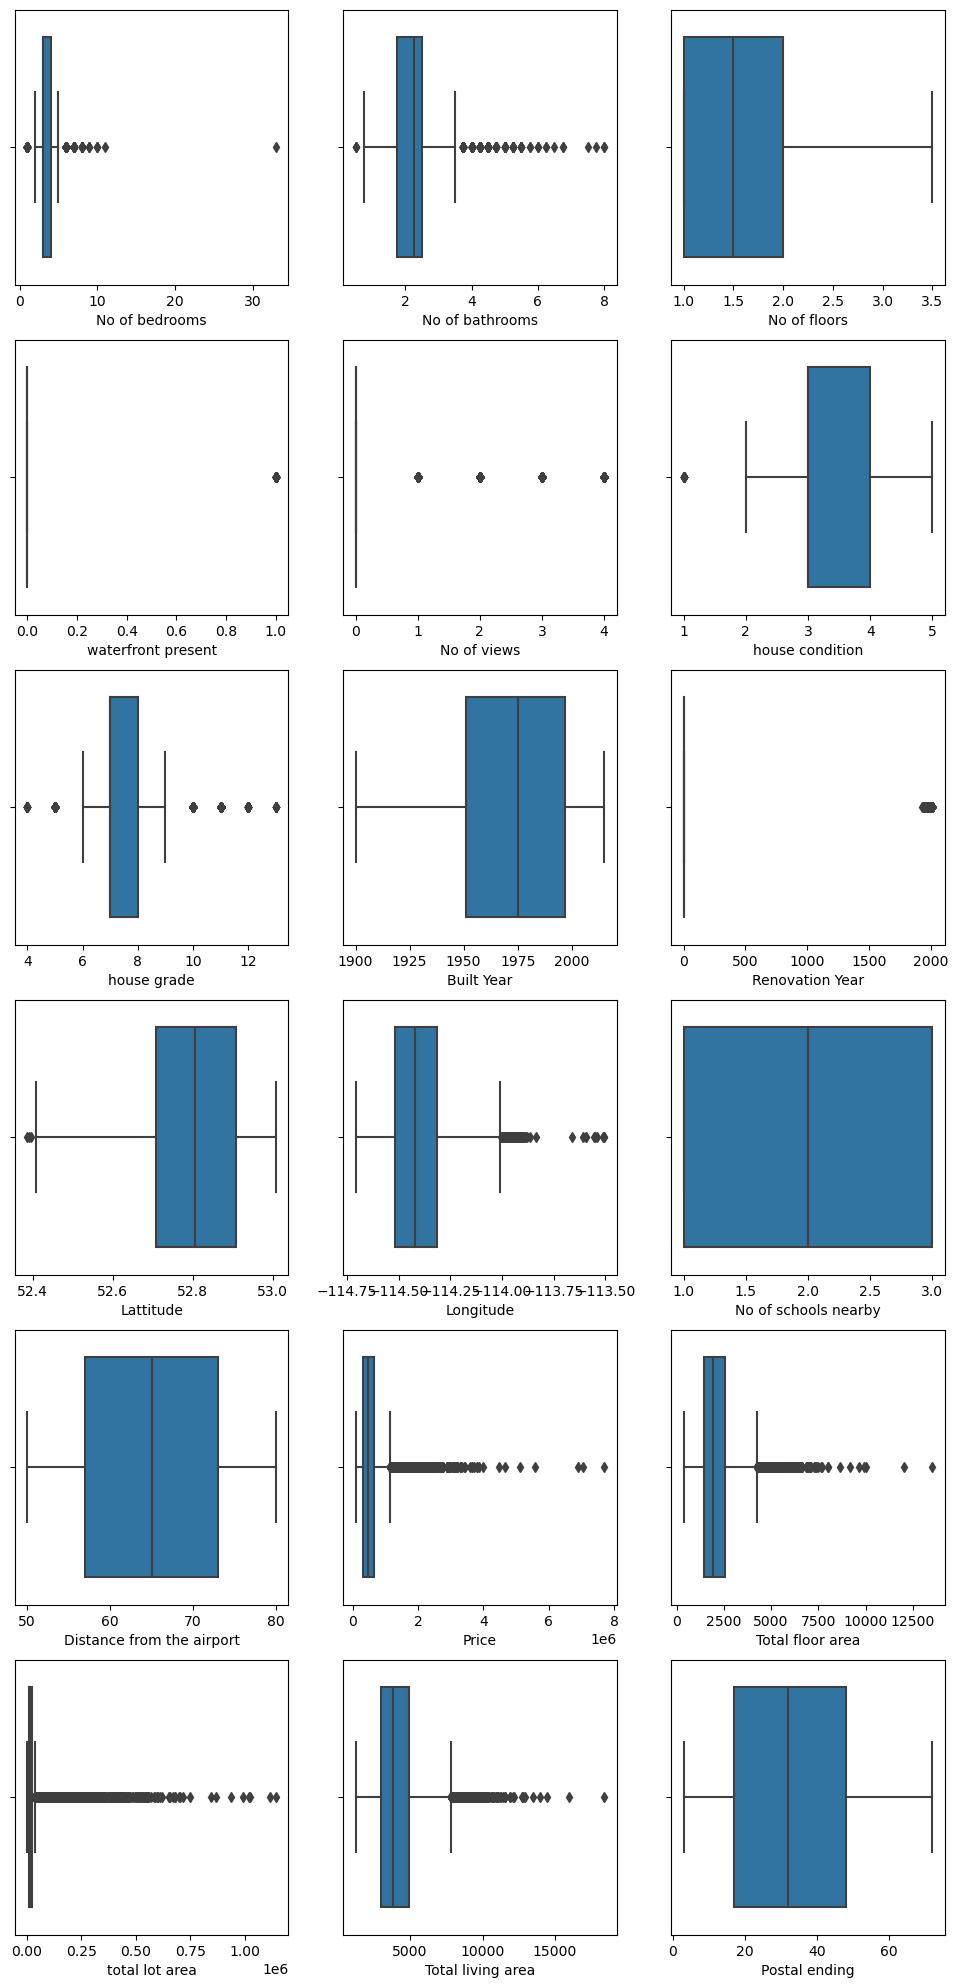

In [31]:
# Creating box plots to check outliers

fig, axes = plt.subplots(6,3, figsize = (12,25))

# 2D array of axes into a 1D array
axes = axes.flatten()

# Loop over each column in the data
for i, j in enumerate(df.columns):
    # horizontal box plot for each column
    sns.boxplot(data = df, x = j, orient = 'h', ax = axes[i])

### Treating Outliers

In [32]:
q1 = df['Price'].quantile(0.25)
q2 = df['Price'].quantile(0.50)
q3 = df['Price'].quantile(0.75)

In [33]:
print(f'Q1 = {q1}\nQ2 = {q2}\nQ3 = {q3}')

Q1 = 320000.0
Q2 = 450000.0
Q3 = 645000.0


In [34]:
IQR = q3-q1 

In [35]:
l_bound = q1 - 1.5 * IQR
u_bound = q3 + 1.5 * IQR

In [36]:
outliers = df[(df['Price']<l_bound)|(df['Price']>u_bound)]

In [37]:
len(outliers)

760

In [38]:
#deleting outliers
df.drop(labels = outliers.index, axis = 0, inplace = True)

In [39]:
df.reset_index(drop = True, inplace = True)

In [40]:
# creating a function to remove outliers

def r_o(df,col_name):
    if col_name not in df.columns:
        raise ValueError("Column dosent exist")
    
    q1 = df[col_name].quantile(0.25)
    q3 = df[col_name].quantile(0.75)
    IQR = q3-q1
    l_b = q1-1.5*IQR
    u_b = q3+1.5*IQR
    o = df[(df[col_name]<l_b)|(df[col_name]>u_b)]
    return o

In [41]:
tfa_i= r_o(df,'Total floor area')

In [42]:
df.drop(labels= tfa_i.index, axis=0, inplace = True)

In [43]:
df.reset_index(drop = True, inplace=True)

In [44]:
l_i = r_o(df,'Longitude')

In [45]:
df.drop(labels= l_i.index, axis=0, inplace = True)

In [46]:
df.reset_index(drop = True, inplace=True)

In [47]:
df['No of bedrooms'].describe()

count    13466.000000
mean         3.323259
std          0.914294
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: No of bedrooms, dtype: float64

In [48]:
df[df['No of bedrooms'] ==33]

,No of bedrooms,No of bathrooms,No of floors,waterfront present,No of views,house condition,house grade,Built Year,Renovation Year,Lattitude,Longitude,No of schools nearby,Distance from the airport,Price,Total floor area,total lot area,Total living area,Postal ending
3224,33,1.75,1.0,0,0,5,7,1947,0,52.9178,-114.521,2,50,640000,1620,10700,2950,28


In [49]:
df.drop(labels=3224, axis = 0,inplace = True)

In [50]:
df.reset_index(drop=True, inplace=True)

In [51]:
r_o(df,'total lot area')

,No of bedrooms,No of bathrooms,No of floors,waterfront present,No of views,house condition,house grade,Built Year,Renovation Year,Lattitude,Longitude,No of schools nearby,Distance from the airport,Price,Total floor area,total lot area,Total living area,Postal ending
0,4,2.50,2.0,0,0,3,9,2001,0,52.9532,-114.321,3,76,838000,3310,85845,6660,5
7,5,2.50,2.0,0,0,3,8,1979,0,52.8094,-114.215,2,51,675000,2820,115869,5640,11
10,4,2.75,2.0,0,0,3,9,2000,0,52.6934,-114.177,1,74,630000,2710,76576,5100,12
13,4,3.25,1.0,0,0,3,9,2007,0,52.7433,-114.300,1,70,625000,2730,165288,5460,15
16,3,2.50,2.0,0,2,3,10,1995,0,52.5556,-114.568,1,71,604000,3240,58118,7290,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13436,3,2.50,1.0,0,0,3,8,1961,0,53.0067,-114.559,3,68,579000,2300,37080,4760,50
13437,4,2.50,2.0,0,0,3,8,1996,0,52.9928,-114.313,3,61,575000,2280,62461,4630,21
13442,3,2.50,2.0,0,0,3,8,2001,0,52.4919,-114.461,1,76,460000,2720,81324,4970,39
13447,3,2.75,1.0,0,2,3,8,1989,0,52.9102,-114.098,2,59,406500,1840,130382,3900,41


**As the data is small it will not be ideal to delete 1342 rows of data. But we will try to remove extreme values**

In [52]:
df['total lot area'].describe()

count    1.346500e+04
mean     2.592364e+04
std      5.636070e+04
min      1.455000e+03
25%      1.000000e+04
50%      1.505200e+04
75%      2.008600e+04
max      1.143043e+06
Name: total lot area, dtype: float64

I have got the extreme values using below method and these are the index values to remove from total lot area 1049,8984,5503,7669,11094,11770,2387

In [53]:
df['total lot area'].max()

1143043

In [54]:
df[df['total lot area']==1143043]

,No of bedrooms,No of bathrooms,No of floors,waterfront present,No of views,house condition,house grade,Built Year,Renovation Year,Lattitude,Longitude,No of schools nearby,Distance from the airport,Price,Total floor area,total lot area,Total living area,Postal ending
1049,5,3.25,1.5,0,0,5,8,1931,0,52.6864,-114.194,2,66,542500,3010,1143043,5460,12


In [55]:
df.drop(labels = [1049,8984,5503,7669,11094,11770,2387], axis = 0, inplace=True)

In [56]:
df.reset_index(drop=True,inplace=True)

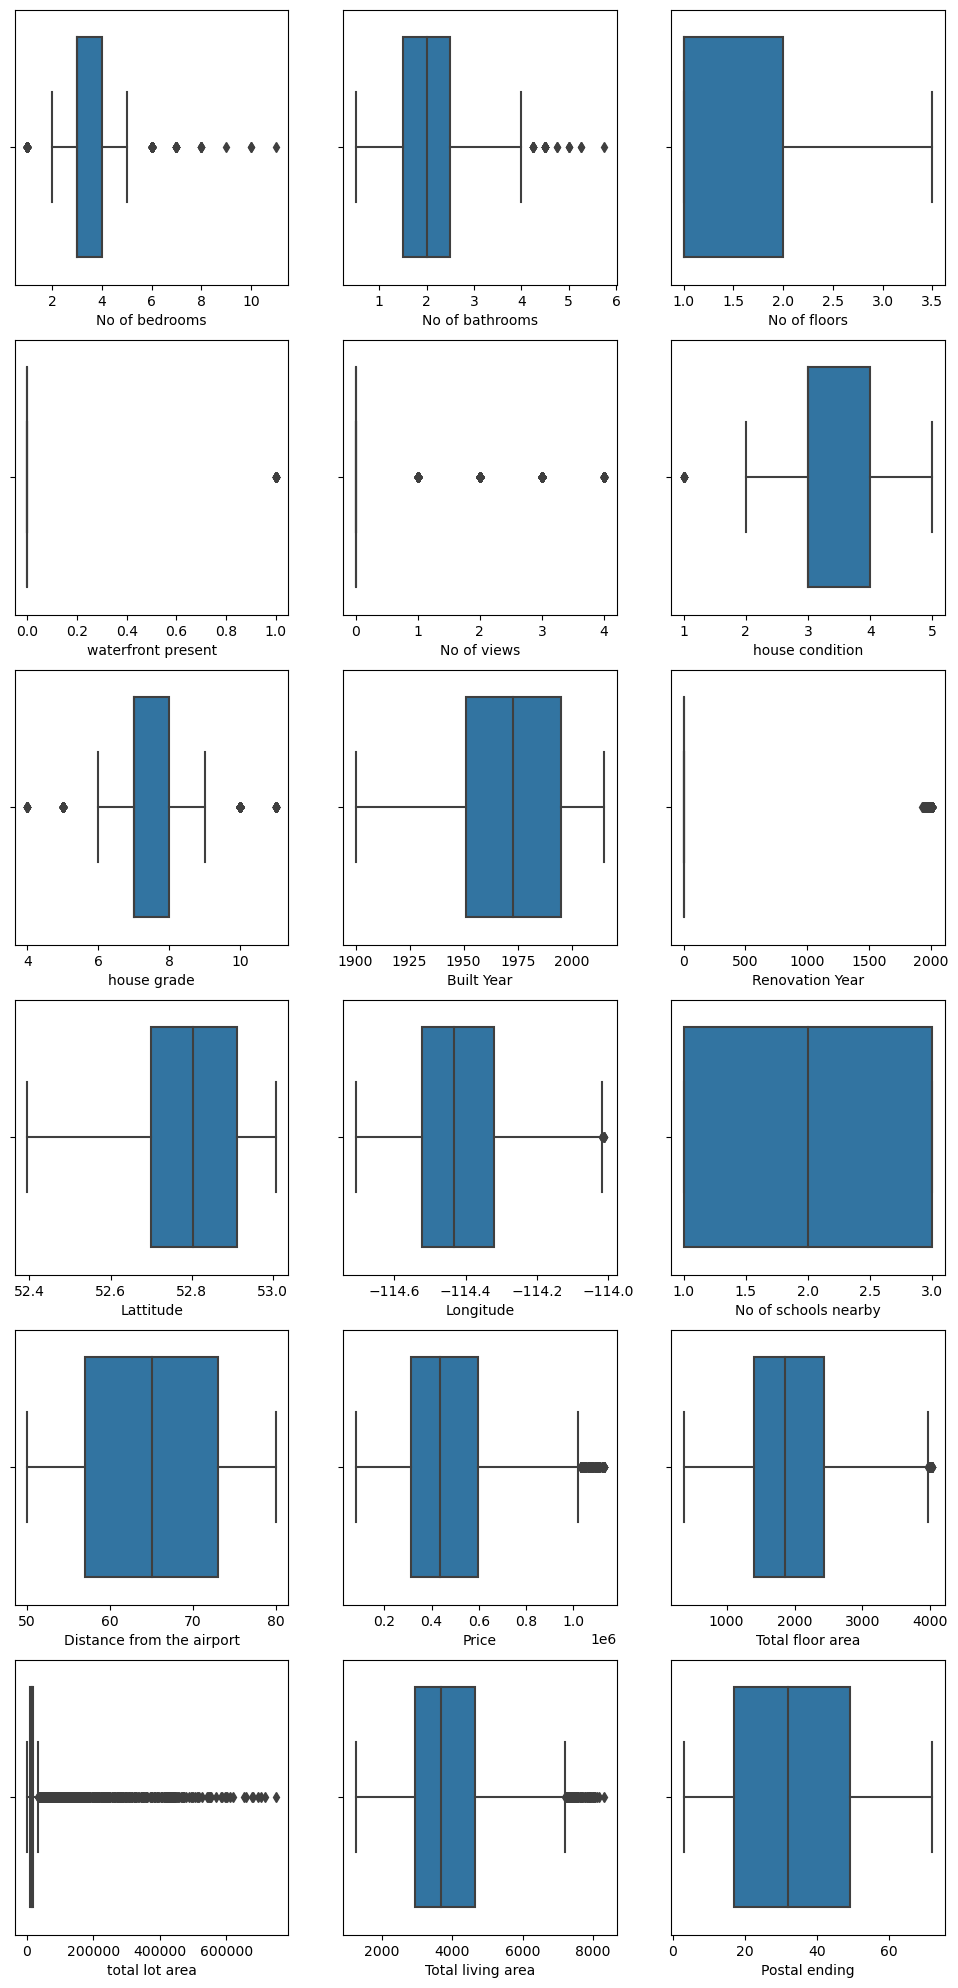

In [57]:
# Checking the outliers again after removing extreme outliers

fig, axes = plt.subplots(6,3, figsize = (12,25))

# 2D array of axes into a 1D array
axes = axes.flatten()

# Loop over each column in the data
for i, j in enumerate(df.columns):
    # Create a horizontal box plot for each column
    sns.boxplot(data = df, x = j, orient = 'h', ax = axes[i])

## Step V: Checking Correlations

In [58]:
corr_matrix = df.corr()

In [59]:
corr_matrix['Price'].sort_values(ascending = False)

Price                        1.000000
Total living area            0.632468
house grade                  0.628098
Total floor area             0.617788
No of bathrooms              0.441161
Lattitude                    0.435455
No of bedrooms               0.290891
No of floors                 0.265119
No of views                  0.238204
Renovation Year              0.096128
Longitude                    0.083941
total lot area               0.066060
house condition              0.057403
waterfront present           0.054404
Built Year                   0.044685
No of schools nearby         0.008043
Distance from the airport    0.007166
Postal ending               -0.298767
Name: Price, dtype: float64

<Axes: >

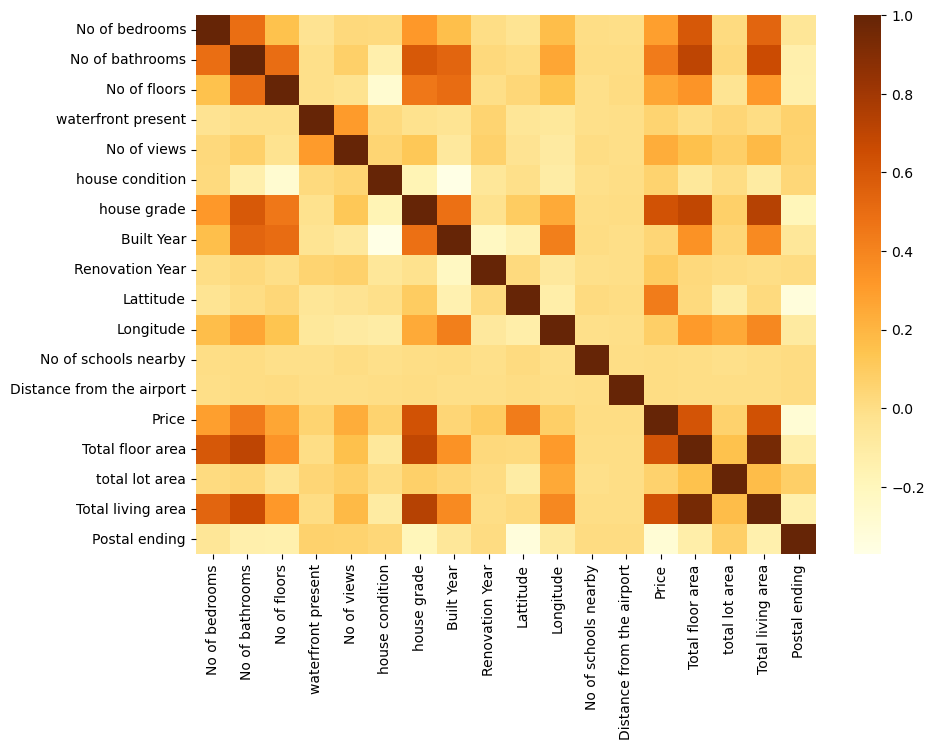

In [60]:
fig, axes = plt.subplots(figsize = (10,7))
sns.heatmap(corr_matrix, cmap = 'YlOrBr')

<Axes: >

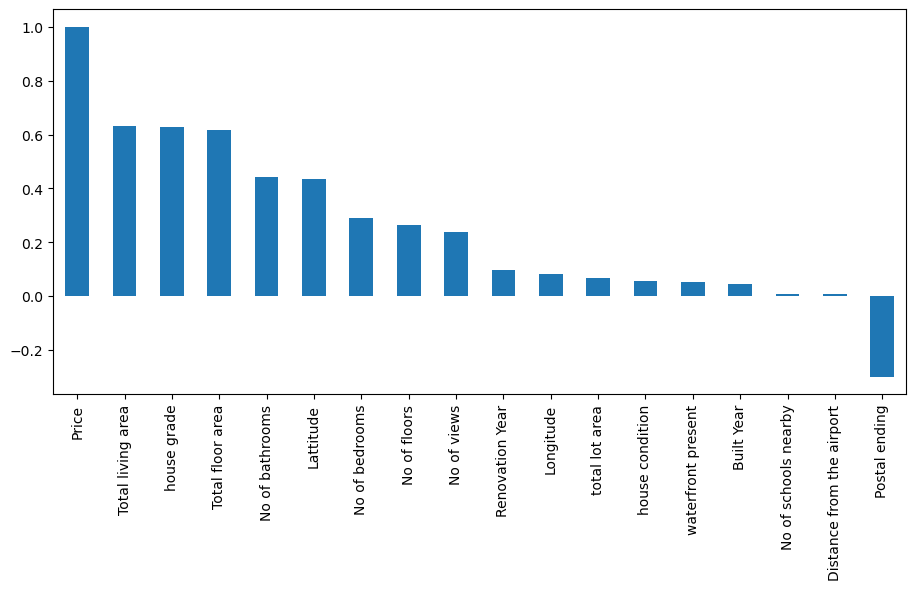

In [61]:
plt.figure(figsize= (11,5))
corr_matrix['Price'].sort_values(ascending= False).plot(kind = "bar")


## Step VI: EDA

### Ques1 How does the number of bedrooms affect the house price?

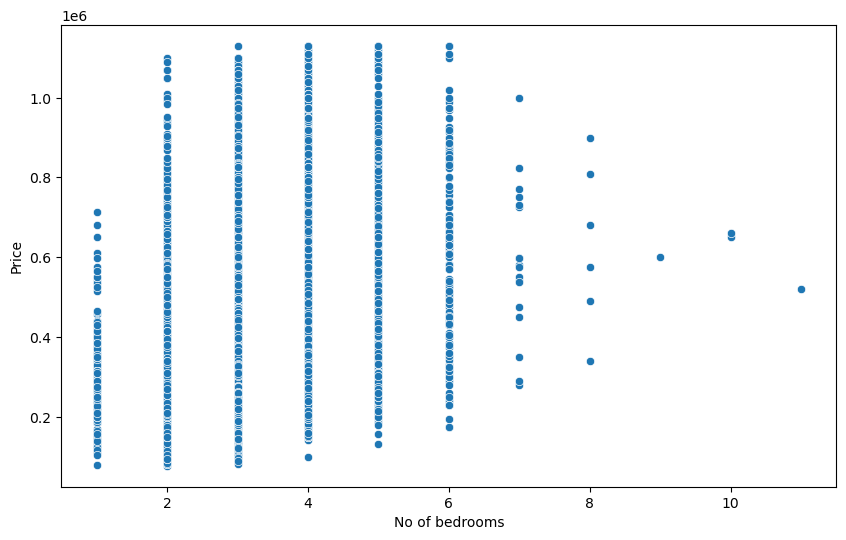

In [62]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = "No of bedrooms", y = 'Price', data = df)
plt.show()

### Ques2 How does the number of bathrooms affect the house price?

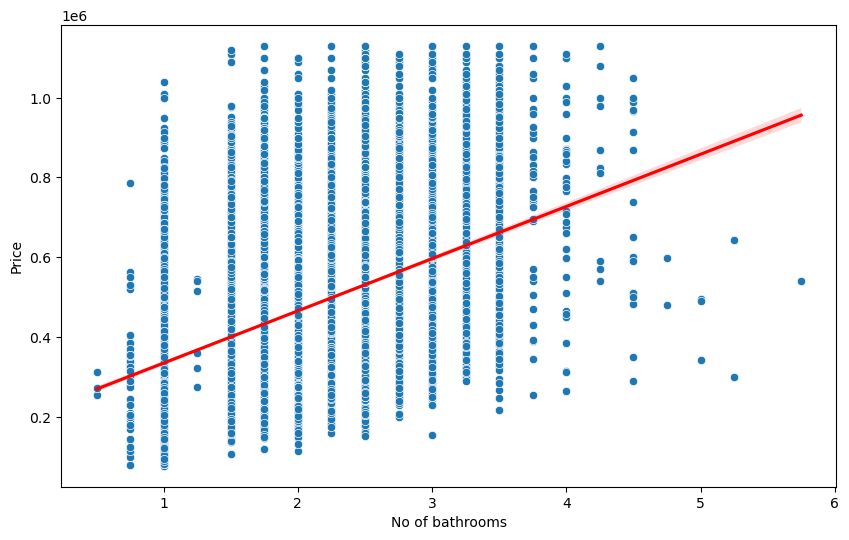

In [63]:
plt.figure(figsize = (10,6))
ax = sns.scatterplot(x = "No of bathrooms", y = 'Price', data = df)
sns.regplot(x = "No of bathrooms", y = 'Price', data = df, scatter=False, ax=ax, color='red')
plt.show()

### Ques3 How does the living area influence the house price?

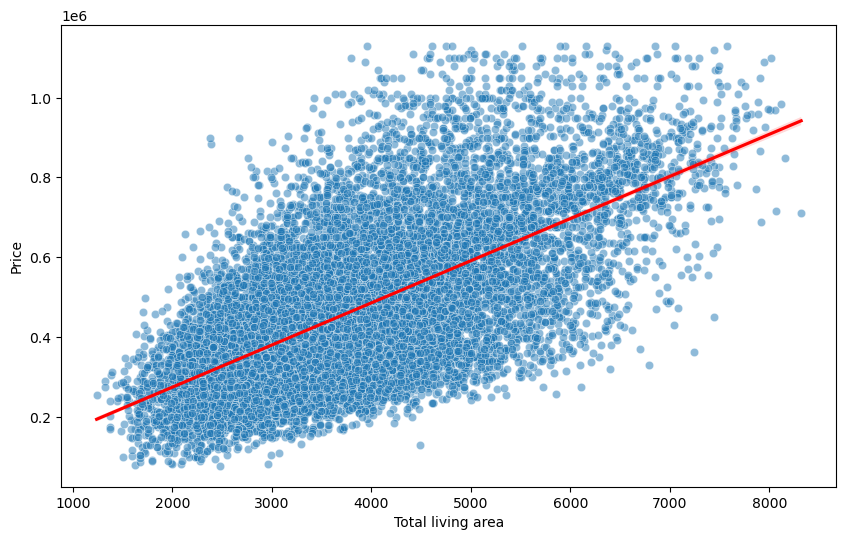

In [64]:
plt.figure(figsize = (10,6))
ax = sns.scatterplot(data=df,x = 'Total living area', y = 'Price', alpha = 0.5)
sns.regplot(x = 'Total living area', y = 'Price', data = df, scatter=False, ax=ax, color='red')
plt.show()

## Step VII: Data Preprocessing

In [65]:
#Storing the Data into X and target into y
X = df.drop('Price', axis = 1)
y = df['Price']

In [66]:
#Splitting the data into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=42)

In [67]:
scaler = StandardScaler()

In [68]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Step VIII: Model Selection and Evaluation

**1. Linear Regression**

In [69]:
model = LinearRegression()

In [70]:
model.fit(X_train, y_train)

LinearRegression()

In [71]:
y_pred = model.predict(X_test)

In [72]:
mse = mean_squared_error(y_test, y_pred)

In [73]:
mae = mean_absolute_error(y_test, y_pred)

In [74]:
rmse = np.sqrt(mse)

In [75]:
r2 = r2_score(y_test,y_pred)

In [76]:
print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R Squared: {r2:.2f}")

Mean Squared Error: 12044867028.82
Mean Absolute Error: 82063.57
Root Mean Squared Error: 109749.11
R Squared: 0.71


**2. Random Forest**

In [77]:
model2 = RandomForestRegressor()

In [78]:
model2.fit(X_train, y_train)

RandomForestRegressor()

In [79]:
y_pred = model2.predict(X_test)

In [80]:
mse2 = mean_squared_error(y_test, y_pred)

In [81]:
mae2 = mean_absolute_error(y_test, y_pred)

In [82]:
rmse2 = np.sqrt(mse2)

In [83]:
r22 = r2_score(y_test, y_pred)

In [84]:
print(f"Mean Squared Error: {mse2:.2f}")
print(f"Mean Absolute Error: {mae2:.2f}")
print(f"Root Mean Squared Error: {rmse2:.2f}")
print(f"R Squared: {r22:.2f}")

Mean Squared Error: 5118292678.29
Mean Absolute Error: 49890.09
Root Mean Squared Error: 71542.24
R Squared: 0.88


**3. Gradient Boosting Regressor**

In [85]:
model3 = GradientBoostingRegressor()

In [86]:
model3.fit(X_train,y_train)

GradientBoostingRegressor()

In [87]:
y_pred = model3.predict(X_test)

In [88]:
mse3 = mean_squared_error(y_test, y_pred)
mae3 = mean_absolute_error(y_test, y_pred)
r23 = r2_score(y_test, y_pred)

In [89]:
print(f"Mean Squared Error: {mse3:.2f}")
print(f"Mean Absolute Error: {mae3:.2f}")
print(f"R Squared: {r23:.2f}")

Mean Squared Error: 6100759435.37
Mean Absolute Error: 55799.55
R Squared: 0.86


**4. XG Boost Regression**

In [90]:
model4 = xgb.XGBRegressor(
    objective='reg:squarederror',  
    n_estimators=100,            
    learning_rate=0.1,
    max_depth=6,                
    subsample=0.8,                 
    colsample_bytree=0.8,          
    random_state=42                
)

In [91]:
model4.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [92]:
y_pred = model4.predict(X_test)

In [93]:
mse4 = mean_squared_error(y_test, y_pred)
mae4 = mean_absolute_error(y_test, y_pred)
r24 = r2_score(y_test, y_pred)

In [94]:
print(f"Mean Squared Error: {mse4:.2f}")
print(f"Mean Absolute Error: {mae4:.2f}")
print(f"R Squared: {r24:.2f}")

Mean Squared Error: 4545161214.77
Mean Absolute Error: 47712.85
R Squared: 0.89


### Summary and Interpretation of the XGBoost as it has performed the best

**High MSE:** The high value of MSE suggests that there are large errors in the prediction, which might be due to the large values of house prices. However, in practical terms, the absolute value might be less intuitive due to its squared nature.

**Moderate MAE:** The MAE of 47,712.85 indicates that on average, the model's predictions are off by this amount.

**High R2:** R-Squared:0.89 Indicates strong explanatory power of the model.

Thank you.